### Movie recommendation system


In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import seaborn as sns

In [126]:
movies=pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')

In [127]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [128]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [129]:
ratings['userId'].nunique()

668

In [130]:
ratings['movieId'].nunique()

10325

In [131]:
genres=[]
for genre in movies.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)   

In [132]:
print(genres)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary', 'Western', 'Film-Noir', '(no genres listed)']


In [133]:
print(movie_title)

['Toy Story', 'Jumanji', 'Grumpier Old Men', 'Waiting to Exhale', 'Father of the Bride Part II', 'Heat', 'Sabrina', 'Tom and Huck', 'Sudden Death', 'GoldenEye', 'American President, The', 'Dracula: Dead and Loving It', 'Balto', 'Nixon', 'Cutthroat Island', 'Casino', 'Sense and Sensibility', 'Four Rooms', 'Ace Ventura: When Nature Calls', 'Money Train', 'Get Shorty', 'Copycat', 'Assassins', 'Powder', 'Leaving Las Vegas', 'Othello', 'Now and Then', 'Persuasion', 'City of Lost Children, The (Cité des enfants perdus, La)', 'Shanghai Triad (Yao a yao yao dao waipo qiao)', 'Dangerous Minds', 'Twelve Monkeys (a.k.a. 12 Monkeys)', 'Wings of Courage', 'Babe', 'Carrington', 'Dead Man Walking', 'Clueless', 'Cry, the Beloved Country', 'Richard III', 'Dead Presidents', 'Restoration', 'Mortal Kombat', 'To Die For', 'How to Make an American Quilt', 'Seven (a.k.a. Se7en)', 'Pocahontas', 'When Night Is Falling', 'Usual Suspects, The', 'Mighty Aphrodite', 'Lamerica', 'Big Green, The', 'Georgia', 'Home f

In [134]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [135]:
df.nunique(axis=0)

userId         668
movieId      10325
rating          10
timestamp    84686
title        10323
genres         938
dtype: int64

## User 1 and 2 csv file generation


In [136]:
one_user=df.loc[df['userId']==1]


In [137]:
one_user.drop(columns=['userId','timestamp'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [138]:
one_user.to_csv("user1.csv")

In [139]:
df_user1=pd.read_csv("user1.csv")

In [140]:
df_user1

,Unnamed: 0,movieId,rating,title,genres
0,0,16,4.0,Casino (1995),Crime|Drama
1,1,24,1.5,Powder (1995),Drama|Sci-Fi
2,2,32,4.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,3,47,4.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,4,50,4.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
108,108,48780,4.0,"Prestige, The (2006)",Drama|Mystery|Sci-Fi|Thriller
109,109,49272,3.5,Casino Royale (2006),Action|Adventure|Thriller
110,110,52973,3.5,Knocked Up (2007),Comedy|Drama|Romance
111,111,54286,4.0,"Bourne Ultimatum, The (2007)",Action|Crime|Thriller


In [141]:
a= df_user1.drop(['Unnamed: 0'],axis=1)


In [142]:
df_user1_loc=a.iloc[:,[0,2,3,1]]

In [143]:
df_user1_loc

,movieId,title,genres,rating
0,16,Casino (1995),Crime|Drama,4.0
1,24,Powder (1995),Drama|Sci-Fi,1.5
2,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,4.0
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,4.0
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.0
...,...,...,...,...
108,48780,"Prestige, The (2006)",Drama|Mystery|Sci-Fi|Thriller,4.0
109,49272,Casino Royale (2006),Action|Adventure|Thriller,3.5
110,52973,Knocked Up (2007),Comedy|Drama|Romance,3.5
111,54286,"Bourne Ultimatum, The (2007)",Action|Crime|Thriller,4.0


In [144]:
df_user1_loc.to_csv("final_user1.csv")

In [145]:
two_user=df.loc[df['userId']==11]



In [146]:
two_user.drop(columns=['userId','timestamp'],inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [147]:
two_user.to_csv("user2.csv")


In [148]:

df_user2=pd.read_csv("user2.csv")

In [149]:
df_user2

,Unnamed: 0,movieId,rating,title,genres
0,832,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,833,10,3.0,GoldenEye (1995),Action|Adventure|Thriller
2,834,17,3.0,Sense and Sensibility (1995),Drama|Romance
3,835,19,3.0,Ace Ventura: When Nature Calls (1995),Comedy
4,836,34,3.0,Babe (1995),Children|Drama
...,...,...,...,...,...
92,924,1282,5.0,Fantasia (1940),Animation|Children|Fantasy|Musical
93,925,1291,4.0,Indiana Jones and the Last Crusade (1989),Action|Adventure
94,926,1356,5.0,Star Trek: First Contact (1996),Action|Adventure|Sci-Fi|Thriller
95,927,1374,4.0,Star Trek II: The Wrath of Khan (1982),Action|Adventure|Sci-Fi|Thriller


In [150]:
b= df_user2.drop(['Unnamed: 0'],axis=1)


In [151]:
df_user2_loc=b.iloc[:,[0,2,3,1]]

In [152]:
df_user2_loc

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,10,GoldenEye (1995),Action|Adventure|Thriller,3.0
2,17,Sense and Sensibility (1995),Drama|Romance,3.0
3,19,Ace Ventura: When Nature Calls (1995),Comedy,3.0
4,34,Babe (1995),Children|Drama,3.0
...,...,...,...,...
92,1282,Fantasia (1940),Animation|Children|Fantasy|Musical,5.0
93,1291,Indiana Jones and the Last Crusade (1989),Action|Adventure,4.0
94,1356,Star Trek: First Contact (1996),Action|Adventure|Sci-Fi|Thriller,5.0
95,1374,Star Trek II: The Wrath of Khan (1982),Action|Adventure|Sci-Fi|Thriller,4.0


In [153]:
df_user2_loc.to_csv("final_user2.csv")

## Data description and plots

In [154]:
dataset_desc = df.groupby('title')['rating'].describe()

In [155]:
dataset_desc

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'71 (2014),1.0,3.500000,NaN,3.5,3.500,3.50,3.5,3.5
'Hellboy': The Seeds of Creation (2004),1.0,3.000000,NaN,3.0,3.000,3.00,3.0,3.0
'Round Midnight (1986),1.0,2.500000,NaN,2.5,2.500,2.50,2.5,2.5
'Til There Was You (1997),3.0,4.000000,1.000000,3.0,3.500,4.00,4.5,5.0
"'burbs, The (1989)",20.0,3.125000,0.825179,1.0,2.875,3.25,3.5,4.5
...,...,...,...,...,...,...,...,...
loudQUIETloud: A Film About the Pixies (2006),1.0,4.500000,NaN,4.5,4.500,4.50,4.5,4.5
xXx (2002),24.0,2.958333,1.309801,0.5,2.500,3.00,4.0,5.0
xXx: State of the Union (2005),7.0,2.071429,1.017700,0.5,1.500,2.00,3.0,3.0


In [156]:
dataset_desc = dataset_desc.reset_index()

In [157]:
dataset_desc

,title,count,mean,std,min,25%,50%,75%,max
0,'71 (2014),1.0,3.500000,NaN,3.5,3.500,3.50,3.5,3.5
1,'Hellboy': The Seeds of Creation (2004),1.0,3.000000,NaN,3.0,3.000,3.00,3.0,3.0
2,'Round Midnight (1986),1.0,2.500000,NaN,2.5,2.500,2.50,2.5,2.5
3,'Til There Was You (1997),3.0,4.000000,1.000000,3.0,3.500,4.00,4.5,5.0
4,"'burbs, The (1989)",20.0,3.125000,0.825179,1.0,2.875,3.25,3.5,4.5
...,...,...,...,...,...,...,...,...,...
10318,loudQUIETloud: A Film About the Pixies (2006),1.0,4.500000,NaN,4.5,4.500,4.50,4.5,4.5
10319,xXx (2002),24.0,2.958333,1.309801,0.5,2.500,3.00,4.0,5.0
10320,xXx: State of the Union (2005),7.0,2.071429,1.017700,0.5,1.500,2.00,3.0,3.0
10321,¡Three Amigos! (1986),40.0,3.012500,1.140667,0.5,2.000,3.00,4.0,5.0


In [158]:
df['rating'].value_counts()

4.0    28880
3.0    21729
5.0    14856
3.5    12237
4.5     8187
2.0     7943
2.5     5484
1.0     3258
1.5     1567
0.5     1198
Name: rating, dtype: int64

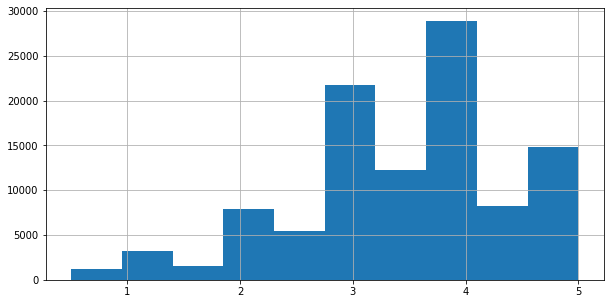

In [159]:
df['rating'].hist(figsize= (10,5))
plt.show()

In [160]:
df1=df.groupby(['title'])[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


<BarContainer object of 20 artists>

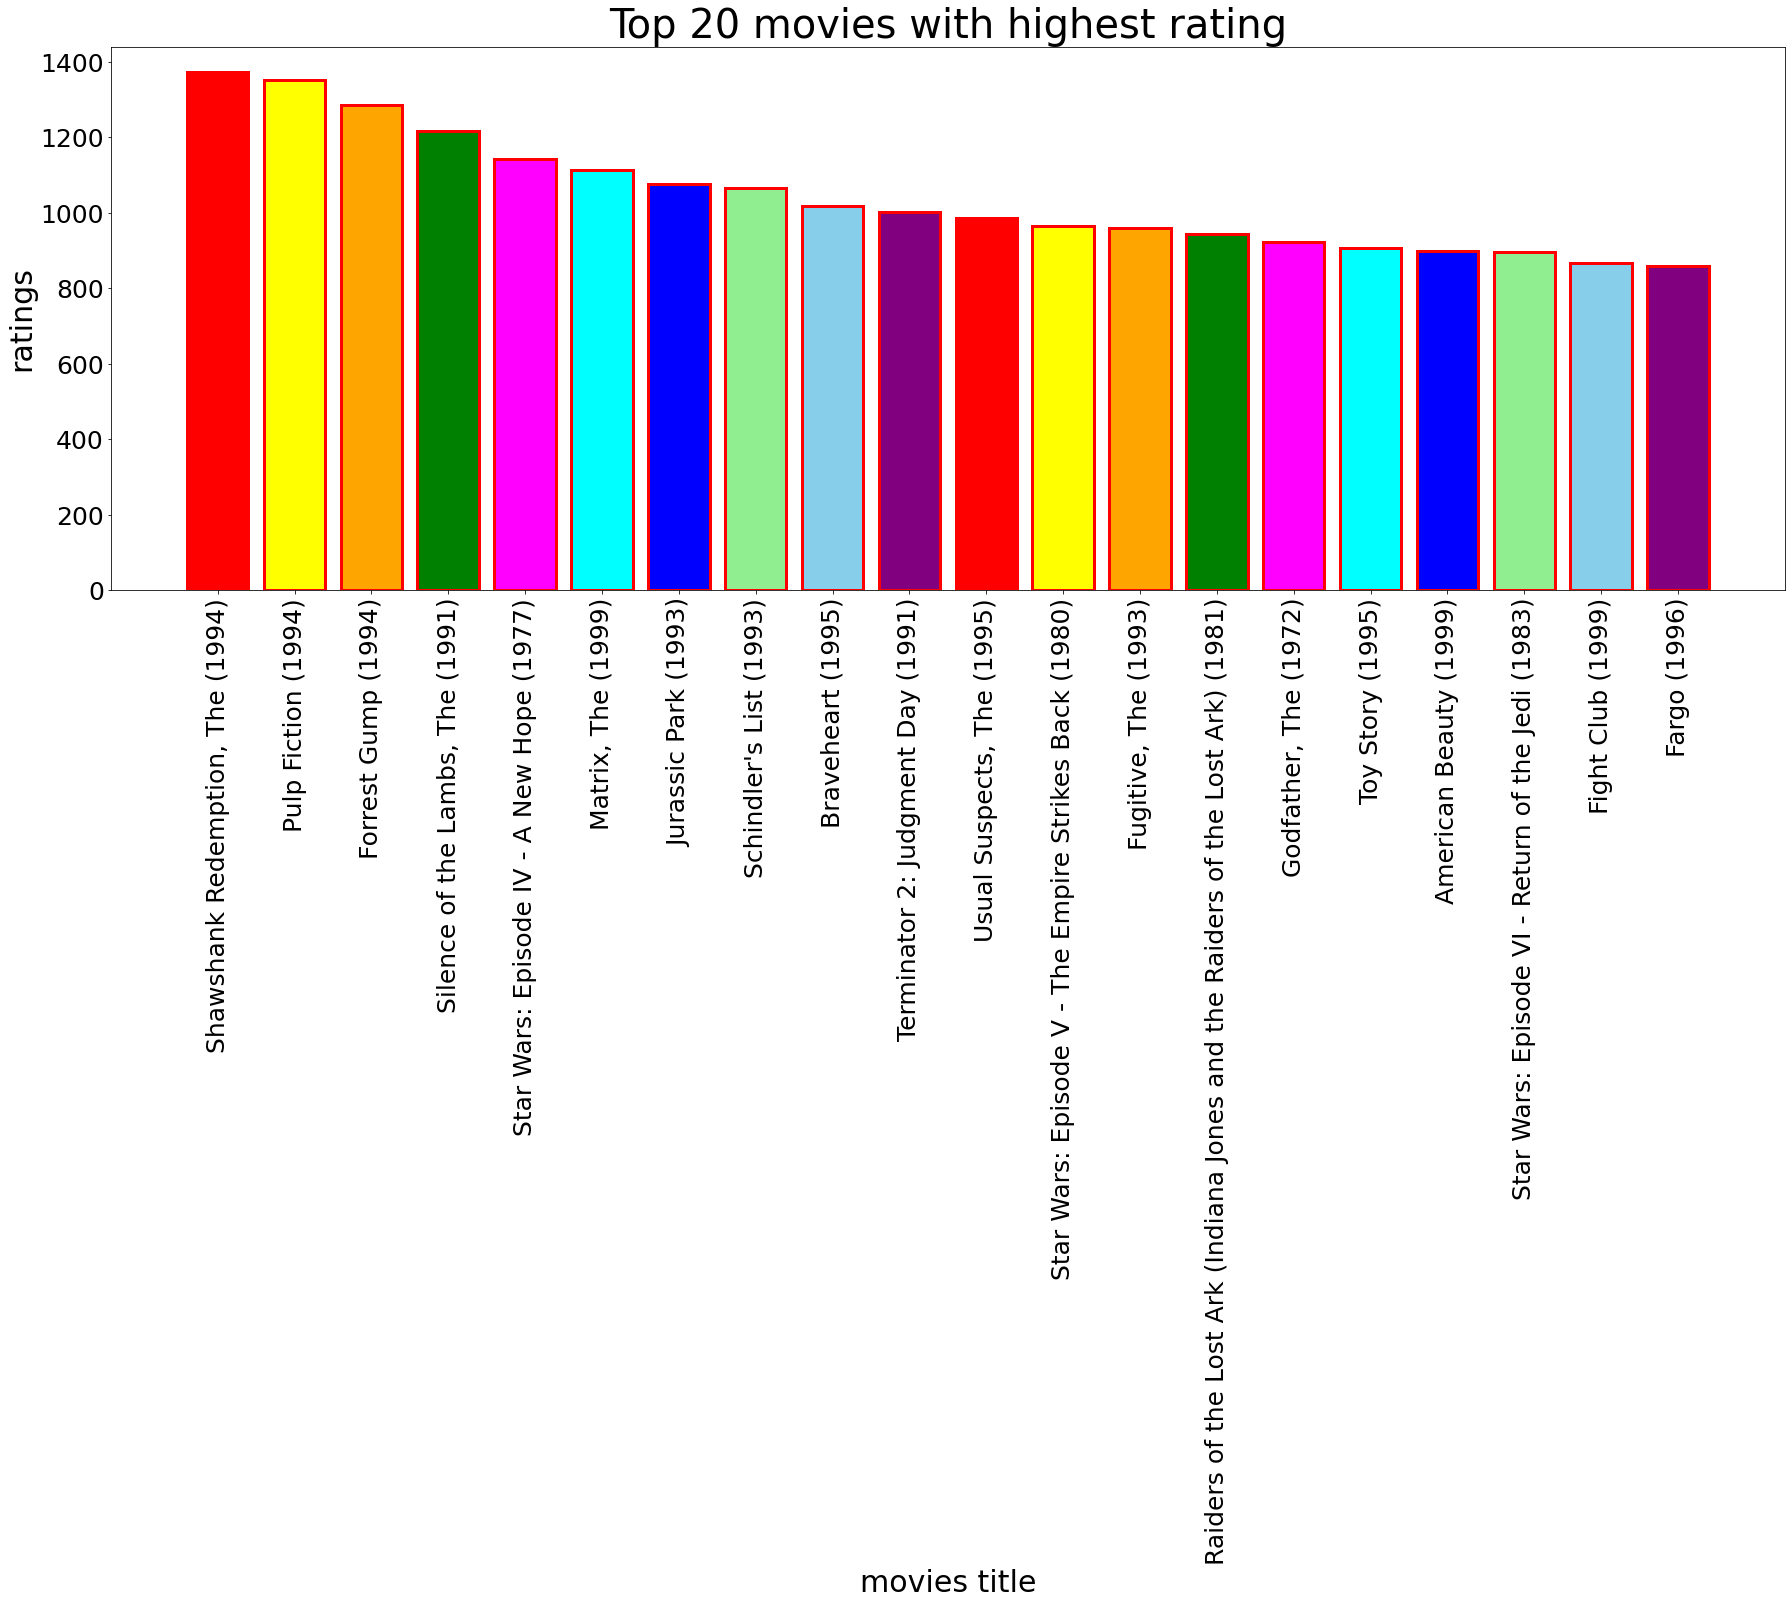

In [161]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='red',color=colors)

In [162]:
df2=df.groupby('title')[['rating']].count()
rating_count_20=df2.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


<BarContainer object of 20 artists>

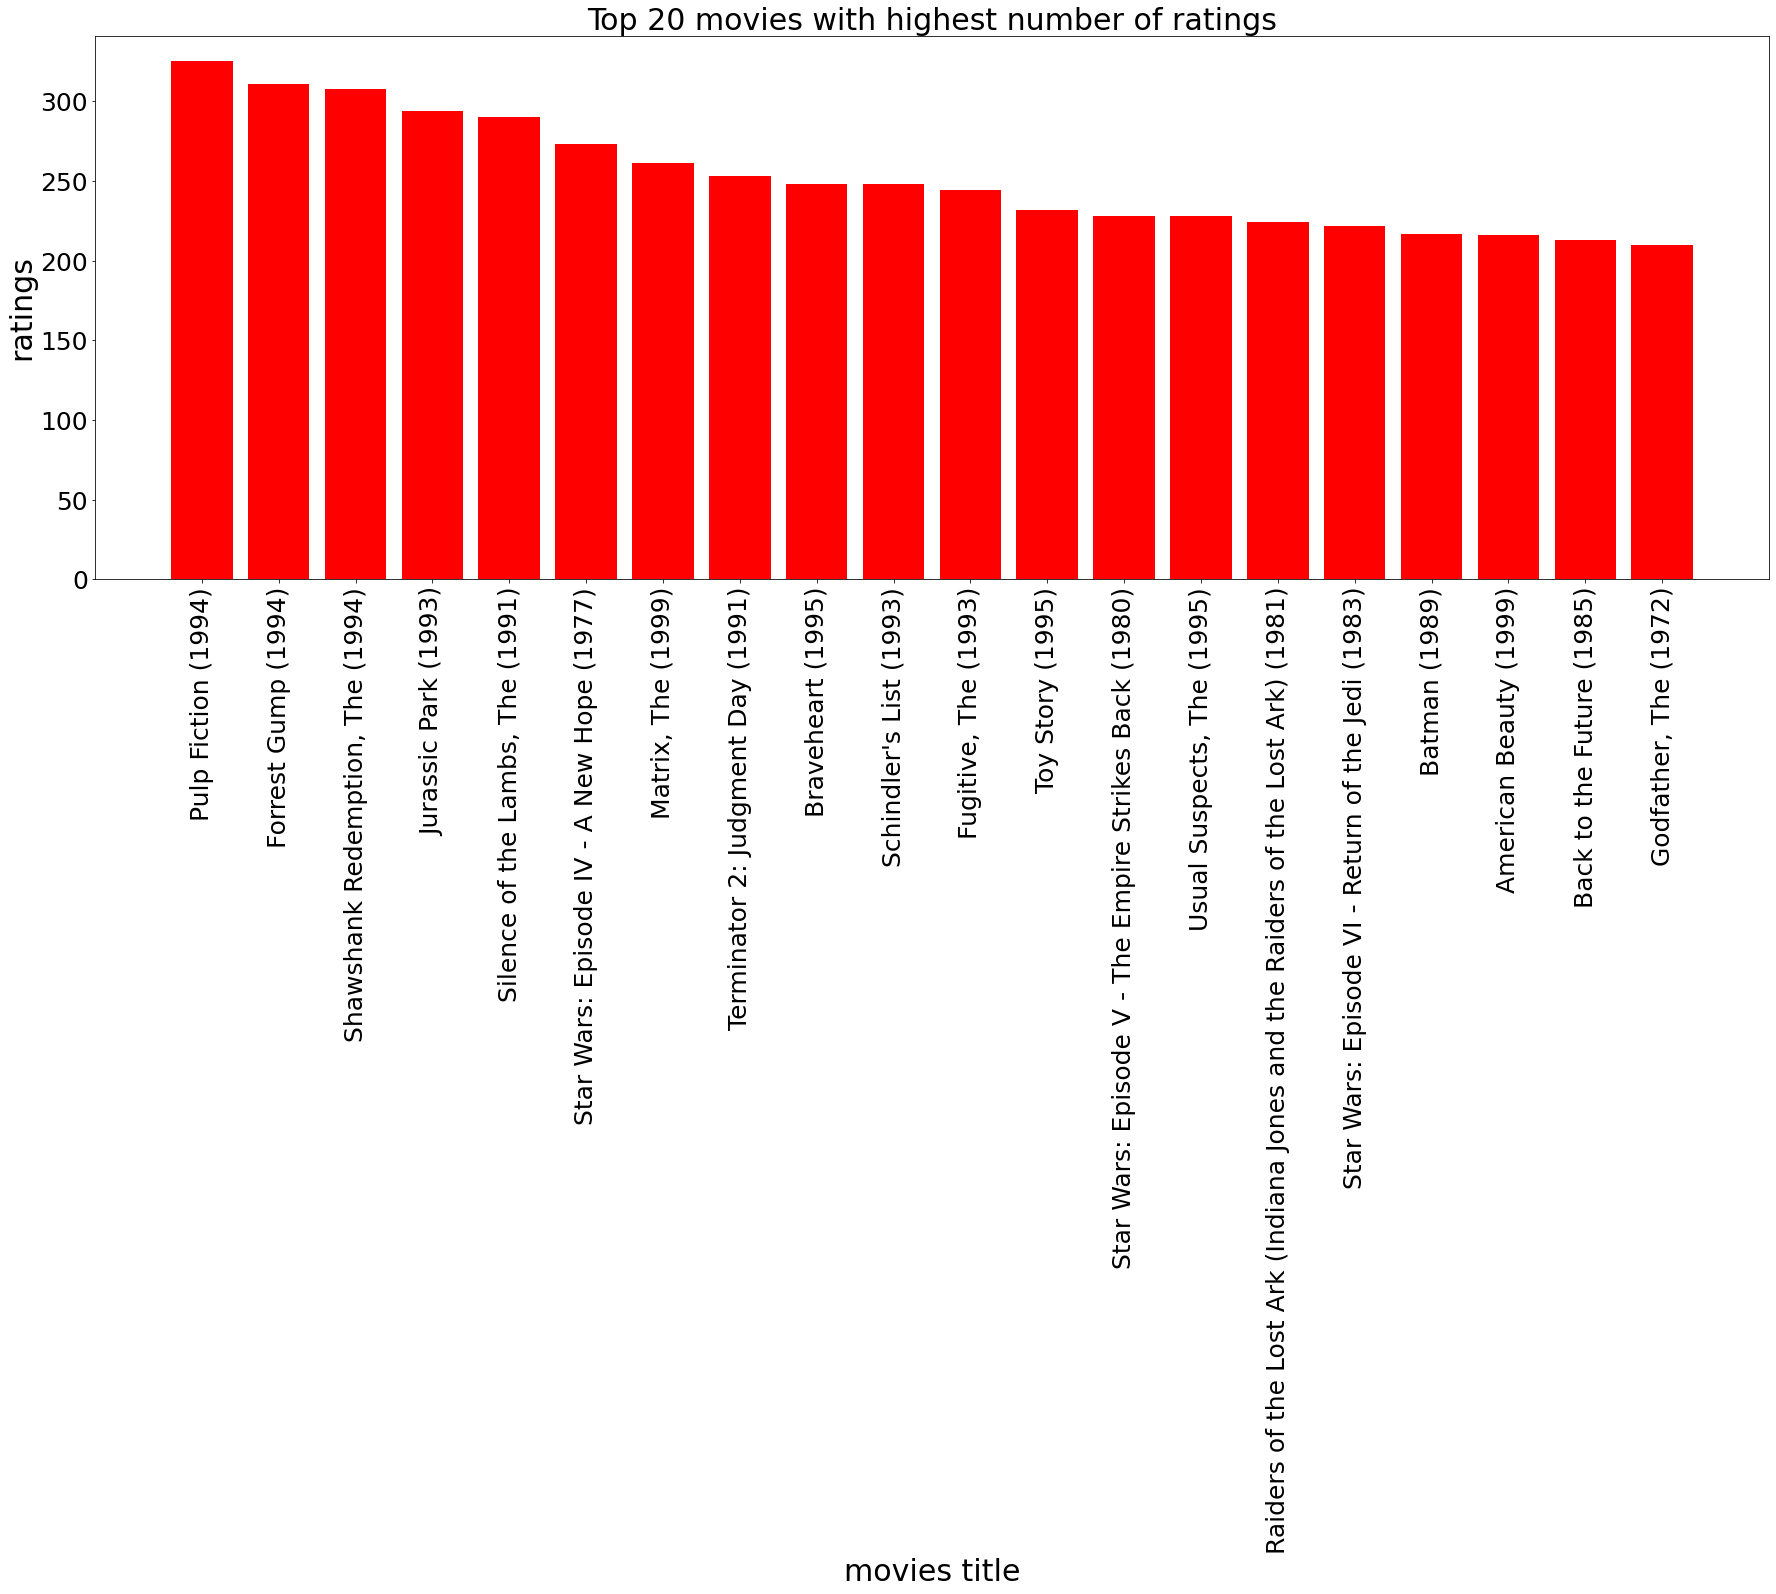

In [163]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('movies title',fontsize=30)
plt.ylabel('ratings',fontsize=30)

plt.bar(rating_count_20.index,rating_count_20.rating,color='red')

## Recommendation - average rating based

In [169]:
average_ratings = (ratings).groupby(['movieId']).mean()
sorted_avg_ratings = average_ratings.sort_values(by="rating", ascending=False)
df = sorted_avg_ratings.join(movies['genres'], on='movieId')
df = df.join(movies['title'], on='movieId')
df = df[df.columns[1:]]

print("RECOMMENDED FOR ANYBODY:")
df.dropna()

RECOMMENDED FOR ANYBODY:


,rating,timestamp,genres,title
movieId,,,,
465,5.0,9.011551e+08,Crime|Thriller,Romeo Is Bleeding (1993)
1757,5.0,1.240732e+09,Comedy|Romance,Mr. & Mrs. Smith (1941)
5003,5.0,1.032191e+09,Comedy|Romance,Intolerable Cruelty (2003)
5007,5.0,1.021830e+09,Horror,"Texas Chainsaw Massacre, The (2003)"
5037,5.0,1.138403e+09,Documentary,"Revolution Will Not Be Televised, The (a.k.a. ..."
...,...,...,...,...
6827,0.5,1.121284e+09,Drama|Musical|Romance,Walk the Line (2005)
2449,0.5,1.341359e+09,Action|Drama|War,"Longest Day, The (1962)"
6007,0.5,1.068973e+09,Crime|Drama|Film-Noir|Mystery,"Naked City, The (1948)"


In [170]:
average_ratings = (ratings).groupby('movieId') \
       .agg(count=('userId', 'size'), rating=('rating', 'mean')) \
       .reset_index()

sorted_avg_ratings = average_ratings.sort_values(by="rating", ascending=False)
df = sorted_avg_ratings.join(movies['genres'], on='movieId')
df = df.join(movies['title'], on='movieId')
df = df[df.columns[1:]]


print("RECOMMENDED FOR ANYBODY:")
df.dropna()

RECOMMENDED FOR ANYBODY:


,count,rating,genres,title
412,1,5.0,Crime|Thriller,Romeo Is Bleeding (1993)
1388,1,5.0,Comedy|Romance,Mr. & Mrs. Smith (1941)
3893,1,5.0,Comedy|Romance,Intolerable Cruelty (2003)
3896,1,5.0,Horror,"Texas Chainsaw Massacre, The (2003)"
3917,1,5.0,Documentary,"Revolution Will Not Be Televised, The (a.k.a. ..."
...,...,...,...,...
4981,1,0.5,Drama|Musical|Romance,Walk the Line (2005)
1957,1,0.5,Action|Drama|War,"Longest Day, The (1962)"
4498,1,0.5,Crime|Drama|Film-Noir|Mystery,"Naked City, The (1948)"
1968,1,0.5,Comedy,Irma la Douce (1963)


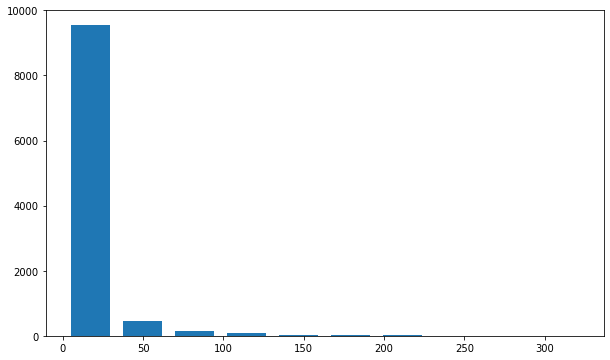

In [171]:
plt.figure(figsize=(10,6))
plt.hist(df['count'],bins=10,rwidth=0.75)
plt.show()

In [172]:
minimum_to_include = 30 #<-- You can try changing this minimum to include movies rated by fewer or more people

average_ratings = (ratings).groupby(['movieId']).mean()
rating_counts = (ratings).groupby(['movieId']).count()
average_ratings = average_ratings.loc[rating_counts['rating'] > minimum_to_include]
sorted_avg_ratings = average_ratings.sort_values(by="rating", ascending=False)
df = sorted_avg_ratings.join(movies['genres'], on='movieId')
df = df.join(movies['title'], on='movieId')
df = df[df.columns[1:]]

print("RECOMMENDED FOR ANYBODY:")
df.iloc[:10,[3,2,0]]

RECOMMENDED FOR ANYBODY:


,title,genres,rating
movieId,,,
1172,Kolya (Kolja) (1996),Comedy|Drama,4.459459
318,Higher Learning (1995),Drama,4.454545
1217,Hollow Reed (1996),Drama,4.403226
923,Snowriders (1996),Documentary,4.396104
858,Jude (1996),Drama,4.392857
3000,"Wisdom of Crocodiles, The (a.k.a. Immortality)...",Romance|Thriller,4.384615
1945,Tea with Mussolini (1999),Comedy|Drama|War,4.371429
904,"Funeral, The (1996)",Crime|Drama,4.331081
50,"Big Green, The (1995)",Children|Comedy,4.328947


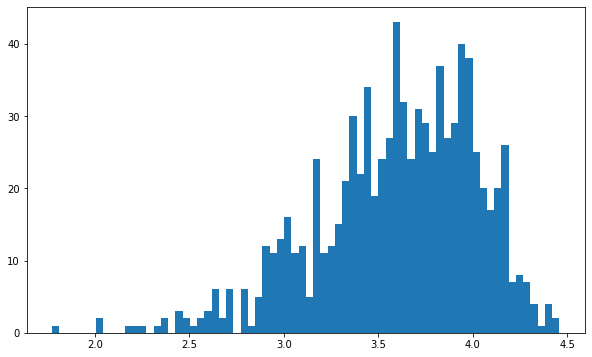

In [173]:
plt.figure(figsize=(10,6))
plt.hist(df['rating'],bins=70)
plt.show()

## Genre based recommendation

In [174]:
average_ratings = (ratings).groupby(['movieId']).mean()
rating_counts = (ratings).groupby(['movieId']).count()
average_ratings = average_ratings.loc[rating_counts['rating'] > minimum_to_include]
average_ratings = average_ratings.join(movies['genres'], on='movieId')
average_ratings = average_ratings.loc[average_ratings['genres'].str.contains('Drama',na=False)]

sorted_avg_ratings = average_ratings.sort_values(by="rating", ascending=False)
df = sorted_avg_ratings.join(movies['title'], on='movieId')
df = df[df.columns[1:]]
print("RECOMMENDED FOR AN DRAMA MOVIE FAN:")
df.iloc[:,[3,2,0]]

RECOMMENDED FOR AN DRAMA MOVIE FAN:


,title,genres,rating
movieId,,,
1172,Kolya (Kolja) (1996),Comedy|Drama,4.459459
318,Higher Learning (1995),Drama,4.454545
1217,Hollow Reed (1996),Drama,4.403226
858,Jude (1996),Drama,4.392857
1945,Tea with Mussolini (1999),Comedy|Drama|War,4.371429
...,...,...,...
849,To Gillian on Her 37th Birthday (1996),Drama|Romance,2.500000
256,Poison Ivy II (1996),Drama|Thriller,2.377551
2701,"Night to Remember, A (1958)",Action|Drama,2.164179


In [175]:
average_ratings = (ratings).groupby(['movieId']).mean()
rating_counts = (ratings).groupby(['movieId']).count()
average_ratings = average_ratings.loc[rating_counts['rating'] > minimum_to_include]
average_ratings = average_ratings.join(movies['genres'], on='movieId')
average_ratings = average_ratings.loc[average_ratings['genres'].str.contains('Action',na=False)]

sorted_avg_ratings = average_ratings.sort_values(by="rating", ascending=False)
df = sorted_avg_ratings.join(movies['title'], on='movieId')
df = df[df.columns[1:]]
print("RECOMMENDED FOR AN ACTION MOVIE FAN:")
df.iloc[:,[3,2,0]]

RECOMMENDED FOR AN ACTION MOVIE FAN:


,title,genres,rating
movieId,,,
1252,Speed 2: Cruise Control (1997),Action|Romance|Thriller,4.323529
1213,Anaconda (1997),Action|Adventure|Thriller,4.259259
5618,"Day After Tomorrow, The (2004)",Action|Adventure|Drama|Sci-Fi|Thriller,4.236111
2019,Westworld (1973),Action|Sci-Fi|Thriller|Western,4.217742
1230,"Truth or Consequences, N.M. (1997)",Action|Crime|Romance,4.205882
...,...,...,...
4367,Jackass: The Movie (2002),Action|Comedy|Documentary,2.662500
19,Money Train (1995),Action|Comedy|Crime|Drama|Thriller,2.642857
455,"Program, The (1993)",Action|Drama,2.641026


# 1 Movie matrix - Cosine similiarity

In [176]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [177]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['genres'])

In [178]:
moviemat=df.pivot_table(index='userId' , columns='title' , values='rating')


In [179]:
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [181]:
indices=pd.Series(movies.index,index=movies['title'])
titles=movies['title']

In [182]:
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]



In [183]:

movie_name = input(' Enter your favourite movie name : ')
print('Recommendations')
recommendations(movie_name)

 Enter your favourite movie name : Fugitive, The (1993)
Recommendations


164                          Safe (1995)
172           Tie That Binds, The (1995)
197                     Dream Man (1995)
211                      Hideaway (1995)
332                 Red Rock West (1992)
370                         Blink (1994)
405                 Fugitive, The (1993)
435                        Malice (1993)
483                        Sliver (1993)
572                          Fear (1996)
713     Baton Rouge (Bâton rouge) (1988)
863                      Sleepers (1996)
1089                    Cape Fear (1991)
1468            Perfect Murder, A (1998)
1677               Dead Zone, The (1983)
1732                       Frenzy (1972)
1733                        Topaz (1969)
1734                 Torn Curtain (1966)
1739                    I Confess (1953)
1746                  See the Sea (1997)
Name: title, dtype: object

# Combined user recommendation using lenskit

In [184]:
import csv

u1_dict = {}
u2_dict = {}



In [185]:
with open("final_user1.csv", newline='',encoding='cp437') as csvfile:
  ratings_reader = csv.DictReader(csvfile)
  for row in ratings_reader:
    if ((row['rating'] != "") and (float(row['rating']) > 0) and (float(row['rating']) < 6)):
      u1_dict.update({int(row['movieId']): float(row['rating'])})
      


In [186]:
u1_dict

{16: 4.0,
 24: 1.5,
 32: 4.0,
 47: 4.0,
 50: 4.0,
 110: 4.0,
 150: 3.0,
 161: 4.0,
 165: 3.0,
 204: 0.5,
 223: 4.0,
 256: 0.5,
 260: 4.5,
 261: 1.5,
 277: 0.5,
 296: 4.0,
 318: 4.0,
 349: 4.5,
 356: 3.0,
 377: 2.5,
 380: 3.0,
 457: 4.0,
 480: 3.5,
 527: 4.5,
 589: 3.5,
 590: 3.5,
 592: 2.5,
 593: 5.0,
 597: 3.0,
 608: 3.5,
 648: 3.5,
 719: 0.5,
 724: 3.5,
 736: 3.0,
 780: 3.5,
 858: 5.0,
 912: 5.0,
 968: 4.5,
 1061: 4.0,
 1089: 4.5,
 1136: 5.0,
 1196: 4.5,
 1198: 4.0,
 1210: 4.5,
 1213: 5.0,
 1220: 4.0,
 1221: 5.0,
 1222: 5.0,
 1233: 4.5,
 1243: 3.5,
 1258: 4.5,
 1265: 3.0,
 1267: 4.0,
 1270: 3.0,
 1287: 4.5,
 1580: 3.5,
 1617: 3.5,
 1721: 1.5,
 1923: 1.5,
 1961: 3.0,
 2021: 4.0,
 2028: 4.5,
 2105: 1.5,
 2161: 1.5,
 2194: 4.5,
 2396: 4.0,
 2407: 2.5,
 2455: 2.0,
 2467: 4.5,
 2502: 4.0,
 2542: 4.5,
 2571: 4.5,
 2628: 3.0,
 2716: 3.5,
 2728: 5.0,
 2762: 3.0,
 2858: 4.0,
 2947: 3.5,
 2959: 5.0,
 3256: 5.0,
 3421: 4.5,
 3578: 4.0,
 4011: 4.5,
 4027: 3.5,
 4033: 3.5,
 4085: 3.5,
 4262: 5.0,

In [187]:
with open("final_user2.csv", newline='',encoding='cp437') as csvfile:
  ratings_reader = csv.DictReader(csvfile)
  for row in ratings_reader:
    if ((row['rating'] != "") and (float(row['rating']) > 0) and (float(row['rating']) < 6)):
      u2_dict.update({int(row['movieId']): float(row['rating'])})
     


In [188]:
u2_dict

{1: 4.0,
 10: 3.0,
 17: 3.0,
 19: 3.0,
 34: 3.0,
 48: 2.0,
 107: 2.0,
 111: 4.0,
 150: 4.0,
 153: 3.0,
 154: 3.0,
 165: 3.0,
 260: 5.0,
 265: 4.0,
 292: 4.0,
 306: 3.0,
 316: 4.0,
 317: 2.0,
 329: 5.0,
 344: 3.0,
 349: 4.0,
 350: 3.0,
 357: 2.0,
 362: 3.0,
 364: 3.0,
 367: 3.0,
 368: 3.0,
 370: 3.0,
 377: 3.0,
 410: 3.0,
 420: 2.0,
 434: 3.0,
 454: 3.0,
 480: 4.0,
 500: 3.0,
 539: 3.0,
 541: 4.0,
 552: 3.0,
 568: 3.0,
 586: 3.0,
 587: 5.0,
 588: 4.0,
 589: 3.0,
 590: 3.0,
 592: 3.0,
 593: 5.0,
 594: 4.0,
 596: 3.0,
 597: 4.0,
 616: 3.0,
 661: 3.0,
 720: 5.0,
 745: 5.0,
 750: 3.0,
 788: 2.0,
 805: 3.0,
 903: 3.0,
 904: 4.0,
 908: 4.0,
 910: 3.0,
 912: 3.0,
 919: 5.0,
 924: 5.0,
 969: 3.0,
 1019: 3.0,
 1023: 4.0,
 1028: 4.0,
 1035: 3.0,
 1036: 3.0,
 1073: 3.0,
 1079: 4.0,
 1080: 3.0,
 1082: 3.0,
 1084: 4.0,
 1086: 3.0,
 1097: 3.0,
 1127: 4.0,
 1136: 4.0,
 1148: 5.0,
 1193: 5.0,
 1196: 5.0,
 1198: 4.0,
 1199: 3.0,
 1200: 4.0,
 1206: 3.0,
 1210: 4.0,
 1214: 4.0,
 1219: 3.0,
 1220: 3.0,
 12

In [189]:
print("Rating dictionaries assembled!")
print("Sanity check:")
print("\tUser1's rating for Die Hard: With a Vengeance (1995) is " + str(u1_dict[165]))
print("\tUser2's rating for Die Hard: With a Vengeance (1995) is " + str(u2_dict[165]))

Rating dictionaries assembled!
Sanity check:
	User1's rating for Die Hard: With a Vengeance (1995) is 3.0
	User2's rating for Die Hard: With a Vengeance (1995) is 3.0


In [190]:
!pip install lenskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [191]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [192]:
ratings.rename(columns = {'userId':'user'}, inplace = True)

In [193]:
ratings.rename(columns = {'movieId':'item'}, inplace = True)

In [194]:
from lenskit.algorithms import Recommender

In [195]:
from lenskit.algorithms.user_knn import UserUser

In [196]:
num_recs = 10  #<---- This is the number of recommendations to generate. You can change this if you want to see more recommendations



In [197]:
user_user = UserUser(15, min_nbrs=3) #These two numbers set the minimum (3) and maximum (15) number of neighbors to consider. These are considered "reasonable defaults," but you can experiment with others too


In [198]:
algo = Recommender.adapt(user_user)


In [199]:
algo.fit(ratings)



In [200]:
print("Set up a User-User algorithm!")

Set up a User-User algorithm!


In [201]:
u1_dict

{16: 4.0,
 24: 1.5,
 32: 4.0,
 47: 4.0,
 50: 4.0,
 110: 4.0,
 150: 3.0,
 161: 4.0,
 165: 3.0,
 204: 0.5,
 223: 4.0,
 256: 0.5,
 260: 4.5,
 261: 1.5,
 277: 0.5,
 296: 4.0,
 318: 4.0,
 349: 4.5,
 356: 3.0,
 377: 2.5,
 380: 3.0,
 457: 4.0,
 480: 3.5,
 527: 4.5,
 589: 3.5,
 590: 3.5,
 592: 2.5,
 593: 5.0,
 597: 3.0,
 608: 3.5,
 648: 3.5,
 719: 0.5,
 724: 3.5,
 736: 3.0,
 780: 3.5,
 858: 5.0,
 912: 5.0,
 968: 4.5,
 1061: 4.0,
 1089: 4.5,
 1136: 5.0,
 1196: 4.5,
 1198: 4.0,
 1210: 4.5,
 1213: 5.0,
 1220: 4.0,
 1221: 5.0,
 1222: 5.0,
 1233: 4.5,
 1243: 3.5,
 1258: 4.5,
 1265: 3.0,
 1267: 4.0,
 1270: 3.0,
 1287: 4.5,
 1580: 3.5,
 1617: 3.5,
 1721: 1.5,
 1923: 1.5,
 1961: 3.0,
 2021: 4.0,
 2028: 4.5,
 2105: 1.5,
 2161: 1.5,
 2194: 4.5,
 2396: 4.0,
 2407: 2.5,
 2455: 2.0,
 2467: 4.5,
 2502: 4.0,
 2542: 4.5,
 2571: 4.5,
 2628: 3.0,
 2716: 3.5,
 2728: 5.0,
 2762: 3.0,
 2858: 4.0,
 2947: 3.5,
 2959: 5.0,
 3256: 5.0,
 3421: 4.5,
 3578: 4.0,
 4011: 4.5,
 4027: 3.5,
 4033: 3.5,
 4085: 3.5,
 4262: 5.0,

In [202]:
u1_recs = algo.recommend(-1, num_recs, ratings=pd.Series(u1_dict))  #Here, -1 tells it that it's not an existing user in the set, that we're giving new ratings, while 10 is how many recommendations it should generate



In [203]:
joined_data = u1_recs.join(movies['genres'], on='item')      
joined_data = joined_data.join(movies['title'], on='item')
joined_data = joined_data[joined_data.columns[2:]]


In [204]:
print("\n\nRECOMMENDED FOR USER 1:")
joined_data.dropna()




RECOMMENDED FOR USER 1:


,genres,title
0,Horror|Sci-Fi|Thriller,Them! (1954)
1,Drama,Anastasia (1956)
2,Comedy,Just One of the Guys (1985)
5,Drama,Life as a House (2001)
6,Drama,"Seventh Veil, The (1945)"
7,Comedy|Documentary,American: The Bill Hicks Story (2009)
8,Sci-Fi,Mission to Mars (2000)
9,Comedy|Romance,"Smile Like Yours, A (1997)"


In [205]:
u2_recs = algo.recommend(-1, num_recs, ratings=pd.Series(u2_dict))  #Here, -1 tells it that it's not an existing user in the set, that we're giving new ratings, while 10 is how many recommendations it should generate

joined_data = u2_recs.join(movies['genres'], on='item')      
joined_data = joined_data.join(movies['title'], on='item')
joined_data = joined_data[joined_data.columns[2:]]
print("RECOMMENDED FOR USER 2:")
joined_data.dropna()

RECOMMENDED FOR USER 2:


,genres,title
0,Crime,True Believer (1989)
1,Action|Comedy|Crime|Thriller,Police Story (Ging chaat goo si) (1985)
2,Comedy|Romance,Benny & Joon (1993)
3,Drama,"Seventh Veil, The (1945)"
5,Horror|Sci-Fi|Thriller,Them! (1954)
6,Children|Comedy|Fantasy,Gordy (1995)
7,Comedy,Just One of the Guys (1985)
8,Action|Drama|Thriller|Western,For a Few Dollars More (Per qualche dollaro in...
9,Drama|War,Night of the Shooting Stars (Notte di San Lore...


In [206]:
u12_dict = {}
for k in u1_dict:
  if k in u2_dict:
    u12_dict.update({k: float((u1_dict[k]+u2_dict[k])/2)})
  else:
    u12_dict.update({k:u1_dict[k]})
for k in u2_dict:
   if k not in u12_dict:
      u12_dict.update({k:u2_dict[k]})
      
print("Combined ratings dictionary assembled!")
print("Sanity check:")
print("\tCombined rating for Die Hard: With a Vengeance (1995) is " + str(u12_dict[165]))

Combined ratings dictionary assembled!
Sanity check:
	Combined rating for Die Hard: With a Vengeance (1995) is 3.0


In [207]:
u12_recs = algo.recommend(-1, num_recs, ratings=pd.Series(u12_dict))  #Here, -1 tells it that it's not an existing user in the set, that we're giving new ratings, while 10 is how many recommendations it should generate

joined_data = u12_recs.join(movies['genres'], on='item')      
joined_data = joined_data.join(movies['title'], on='item')
joined_data = joined_data[joined_data.columns[2:]]
print("\n\nRECOMMENDED FOR USER1 / USER2 HYBRID:")
joined_data.dropna()



RECOMMENDED FOR USER1 / USER2 HYBRID:


,genres,title
0,Drama,Anastasia (1956)
1,Crime,True Believer (1989)
2,Comedy,Just One of the Guys (1985)
3,Horror|Sci-Fi|Thriller,Them! (1954)
5,Drama,"Seventh Veil, The (1945)"
7,Drama,Life as a House (2001)
8,Comedy|Thriller,Mona Lisa (1986)



# Using K Nearest Neighbour

In [208]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [209]:
ratings.head()

,user,item,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [210]:
ratings.rename(columns = {'item':'movieId'}, inplace = True)

In [211]:
movie_details=movies.merge(ratings,on='movieId')

In [212]:
movie_details.head()

,movieId,title,genres,user,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


In [213]:
movie_details.shape

(105339, 6)

In [215]:
movie_details.drop(columns=['timestamp'],inplace=True)

KeyError: ignored

In [218]:
movie_details.shape

(105339, 5)

In [219]:
movie_details.head()

,movieId,title,genres,user,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0


In [220]:
number_rating = movie_details.groupby('title')['rating'].count().reset_index()

In [221]:
number_rating.rename(columns={'rating':'number of rating'},inplace=True)

In [222]:
number_rating.head()

,title,number of rating
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),1
3,'Til There Was You (1997),3
4,"'burbs, The (1989)",20


In [223]:
df_df=movie_details.merge(number_rating,on='title')

In [224]:
df_df

,movieId,title,genres,user,rating,number of rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,232
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,232
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,232
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,232
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,232
...,...,...,...,...,...,...
105334,148238,A Very Murray Christmas (2015),Comedy,475,3.0,1
105335,148626,The Big Short (2015),Drama,458,4.0,3
105336,148626,The Big Short (2015),Drama,576,4.5,3
105337,148626,The Big Short (2015),Drama,668,4.5,3


In [225]:
df_df=df_df[df_df['number of rating']>=50] #selecting valuable books by ratings

In [226]:
df_df.drop_duplicates(['title','user'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [227]:
df_df.shape


(43566, 6)

In [228]:
df_df.drop(columns=['number of rating'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [229]:
df_df.head()

,movieId,title,genres,user,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0


In [230]:
df_df['rating']=df_df['rating'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [231]:
df_df.head()

,movieId,title,genres,user,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4


In [232]:
movie_pivot=df_df.pivot_table(columns='user',index='title',values='rating')

In [233]:
movie_pivot.shape

(455, 666)

In [234]:
movie_pivot.fillna(0,inplace=True)

In [235]:
movie_pivot

user,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Wizard of Oz, The (1939)",0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,5.0
X-Men (2000),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0
X2: X-Men United (2003),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [236]:
from scipy.sparse import csr_matrix
movie_sparse=csr_matrix(movie_pivot)

In [237]:
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors( n_neighbors=7,algorithm='brute',metric='cosine')

In [238]:
model.fit(movie_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=7)

In [239]:
df_df.drop(columns=['genres','user','rating'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [240]:
df_df.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [241]:
df_df.to_csv('codf.csv',index=False)

In [242]:
distances,suggestions=model.kneighbors(movie_pivot.iloc[40,:].values.reshape(1,-1))

In [243]:
distances

array([[7.77156117e-16, 4.99472852e-01, 5.08689399e-01, 5.53599448e-01,
        5.54954593e-01, 5.60596530e-01, 5.64447209e-01]])

In [244]:
suggestions

array([[ 40, 127, 128, 102, 142, 124, 377]])

In [245]:
df1=df_df.copy()
ti=[]
for i in df1['title']:
    ti.append(i.split(' (')[0])
df1['title']=ti

In [246]:
for i in range(len(suggestions)):
    print(movie_pivot.index[suggestions[i]])

Index(['Bad Boys (1995)', 'Die Hard 2 (1990)',
       'Die Hard: With a Vengeance (1995)', 'Con Air (1997)',
       'Enemy of the State (1998)', 'Desperado (1995)', 'Speed (1994)'],
      dtype='object', name='title')


In [247]:
def reco(movie_name):
    movie_id=df1[df1['title']=='Toy Story'].drop_duplicates('title')['movieId'].values[0]
    distances,suggestions=model.kneighbors(movie_pivot.iloc[movie_id,:].values.reshape(1,-1))
    
    
    
    for i in range(len(suggestions)):
        return (movie_pivot.index[suggestions[i]])

In [248]:
res=reco("Fugitive, The (1993)")

In [249]:
for i in res:
    print(i)

12 Angry Men (1957)
Maltese Falcon, The (1941)
Citizen Kane (1941)
To Kill a Mockingbird (1962)
Lawrence of Arabia (1962)
Psycho (1960)
Rear Window (1954)
